## Práctica 2. Procesamiento de lenguaje natural

Grupo 16: Adina Han y Diego Ambite

### Parte 1. Análisis de sentimientos

In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

In [9]:
with open("yelp_labelled.txt","r") as text_file:
    lines_org = text_file.read().split('\n')
len(lines_org)

1001

In [10]:
lines = [line.split("\t") for line in lines_org if len(line.split("\t"))==2 and line.split("\t")[1]!='']
len(lines)

1000

In [11]:
data_line = np.array(lines)
text = data_line[:,0]
target = data_line[:,1]

In [12]:
data = {'Texto':text,'Target':target}

In [13]:
df = pd.DataFrame(data=data)
df.head()

,Texto,Target
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [14]:
df['Label'] = df.Target.map({'0':'Mala','1':'Buena'})

In [15]:
df.head()

,Texto,Target,Label
0,Wow... Loved this place.,1,Buena
1,Crust is not good.,0,Mala
2,Not tasty and the texture was just nasty.,0,Mala
3,Stopped by during the late May bank holiday of...,1,Buena
4,The selection on the menu was great and so wer...,1,Buena


In [16]:
df.keys()

Index(['Texto', 'Target', 'Label'], dtype='object')

In [17]:
df['message_len'] = df.Texto.apply(len)
df.head()

,Texto,Target,Label,message_len
0,Wow... Loved this place.,1,Buena,24
1,Crust is not good.,0,Mala,18
2,Not tasty and the texture was just nasty.,0,Mala,41
3,Stopped by during the late May bank holiday of...,1,Buena,87
4,The selection on the menu was great and so wer...,1,Buena,59


Text(0.5, 0, 'Message Length')

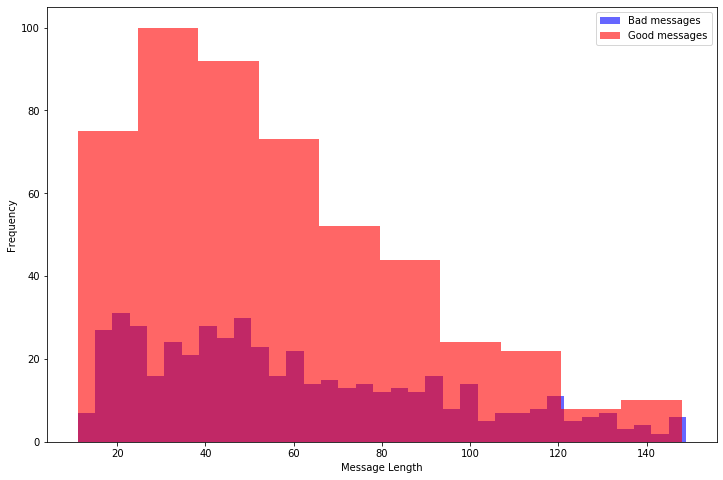

In [18]:
plt.figure(figsize=(12, 8))

df[df.Label=='Mala'].message_len.plot(bins=35, kind='hist', color='blue', 
                                       label='Bad messages', alpha=0.6)
df[df.Label=='Buena'].message_len.plot(kind='hist', color='red', 
                                       label='Good messages', alpha=0.6)
plt.legend()
plt.xlabel("Message Length")

In [19]:
df[df.Label=='Mala'].describe()

,message_len
count,500.000000
mean,60.752000
std,34.226443
min,11.000000
25%,33.000000
50%,52.500000
75%,84.000000
max,149.000000


In [20]:
df[df.Label=='Buena'].describe()

,message_len
count,500.00000
mean,55.88800
std,30.23249
min,11.00000
25%,32.75000
50%,49.50000
75%,73.25000
max,148.00000


### Apartado a)

#### Configura una partición train-test usando el 75% de los datos para entrenamiento y el 25% restante para test.

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df['Texto'], df['Target'], test_size=0.25, random_state=333)

#### Vamos a estudiar varias representaciones de bolsa de palabras, pero todas ellas utilizarán countVectorizer con el diccionario que se crea a partir de los términos del propio corpus y la lista de palabras vacías (stop_words) que proporciona sklearn para el inglés. Las 4 posibilidades que estudiaremos surgen de combinar los siguientes 2 parámetros:

    - Bolsa de palabras binaria (usando el countVectorizer con el parámetro binary=True y sin usar TfidfTransformer) y bolsa de palabras con TF/IDF (usando primero el countVectorizer con el parámetro binary=False, y sobre el resultado el TfidfTransformer)
    
    - Usando un rango de n-gramas de (1,1) y de (1,2) (parámetro ngram_range del countVectorizer). Es decir, haciendo que la bolsa de palabras se consideren solamente monogramas, o que se consideren monogramas y bigramas


In [23]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

### Representación binaria con (1,1) ###

In [24]:
vectorizer_binary_ngram11 = CountVectorizer(stop_words='english',binary=True, ngram_range=(1,1))
X_train_binary_ngram11=vectorizer_binary_ngram11.fit_transform(X_train)

In [25]:
X_test_binary_ngram11 = vectorizer_binary_ngram11.transform(X_test)

In [26]:
X_train_binary_ngram11.shape

(750, 1473)

In [27]:
print(X_train_binary_ngram11)

  (0, 517)	1
  (0, 449)	1
  (0, 1075)	1
  (0, 860)	1
  (0, 441)	1
  (1, 711)	1
  (1, 175)	1
  (1, 1413)	1
  (2, 1257)	1
  (2, 507)	1
  (2, 1153)	1
  (2, 86)	1
  (2, 745)	1
  (3, 959)	1
  (3, 1245)	1
  (3, 1272)	1
  (4, 733)	1
  (4, 101)	1
  (4, 588)	1
  (5, 1088)	1
  (5, 616)	1
  (6, 269)	1
  (6, 941)	1
  (6, 1339)	1
  (6, 1227)	1
  :	:
  (744, 108)	1
  (744, 1084)	1
  (744, 120)	1
  (745, 773)	1
  (745, 127)	1
  (745, 1435)	1
  (745, 750)	1
  (745, 1198)	1
  (746, 360)	1
  (747, 901)	1
  (747, 756)	1
  (747, 1001)	1
  (747, 1224)	1
  (747, 857)	1
  (747, 861)	1
  (747, 1150)	1
  (747, 522)	1
  (747, 424)	1
  (747, 745)	1
  (748, 554)	1
  (748, 507)	1
  (748, 1413)	1
  (749, 1121)	1
  (749, 991)	1
  (749, 448)	1


In [28]:
vectorizer_binary_ngram11.vocabulary_

{'excellent': 441,
 'new': 860,
 'restaurant': 1075,
 'experienced': 449,
 'frenchman': 517,
 'wasn': 1413,
 'busy': 175,
 'know': 711,
 'little': 745,
 'bad': 86,
 'service': 1153,
 'food': 507,
 'sucks': 1257,
 'sushi': 1272,
 'strip': 1245,
 'place': 959,
 'gyro': 588,
 'basically': 101,
 'lettuce': 733,
 'hello': 616,
 'right': 1088,
 'steaks': 1227,
 'trimmed': 1339,
 'perfectly': 941,
 'cooked': 269,
 'atmosphere': 65,
 'fun': 530,
 'good': 554,
 'order': 885,
 'vegetarian': 1379,
 'menu': 814,
 'dinner': 356,
 'wide': 1433,
 'array': 56,
 'options': 884,
 'choose': 220,
 'recently': 1048,
 'tried': 1338,
 'caballero': 179,
 'week': 1425,
 'waitress': 1402,
 'thing': 1303,
 'crazy': 294,
 'guacamole': 584,
 'don': 378,
 'like': 738,
 'purã': 1016,
 'ed': 411,
 'highlights': 623,
 'great': 568,
 'quality': 1020,
 'nigiri': 864,
 'buffet': 166,
 'small': 1179,
 'offered': 872,
 'bland': 133,
 'better': 121,
 'ayce': 80,
 'went': 1429,
 'vegas': 1377,
 'probably': 999,
 'hurry': 653

In [29]:
feature_names = vectorizer_binary_ngram11.get_feature_names()

print(len(feature_names))
print(feature_names)
#print(train_vector_data[10])

1473
['00', '10', '100', '12', '15', '17', '1979', '20', '2007', '23', '30', '35', '40', '40min', '45', '4ths', '5lb', '85', '90', 'absolutely', 'absolutley', 'accomodate', 'accordingly', 'accountant', 'ache', 'acknowledged', 'actual', 'actually', 'added', 'afternoon', 'ago', 'airline', 'albondigas', 'allergy', 'almonds', 'amazing', 'ambiance', 'ambience', 'andddd', 'annoying', 'anymore', 'anytime', 'anyways', 'apologize', 'apology', 'app', 'appalling', 'appealing', 'appetite', 'appetizer', 'appetizers', 'apple', 'approval', 'area', 'arepas', 'aria', 'array', 'arrived', 'arriving', 'article', 'ask', 'asked', 'asking', 'assure', 'ate', 'atmosphere', 'atrocious', 'attached', 'attentive', 'attitudes', 'auju', 'authentic', 'average', 'avoid', 'avoided', 'away', 'awesome', 'awful', 'awkward', 'awkwardly', 'ayce', 'az', 'baba', 'baby', 'bachi', 'bacon', 'bad', 'bagels', 'bakery', 'baklava', 'ball', 'bamboo', 'banana', 'bank', 'bar', 'barely', 'bargain', 'bartender', 'bartenders', 'baseball',

### Representación TF-IDF con (1,1) ###

In [30]:
vectorizer_tfidf_ngram11 = CountVectorizer(stop_words='english',binary=False, ngram_range=(1,1))
X_train_tfidf_ngram11 = vectorizer_tfidf_ngram11.fit_transform(X_train)

In [31]:
X_test_tfidf_ngram11 = vectorizer_tfidf_ngram11.transform(X_test)

In [32]:
vectorizer_tfidf_ngram11.vocabulary_

{'excellent': 441,
 'new': 860,
 'restaurant': 1075,
 'experienced': 449,
 'frenchman': 517,
 'wasn': 1413,
 'busy': 175,
 'know': 711,
 'little': 745,
 'bad': 86,
 'service': 1153,
 'food': 507,
 'sucks': 1257,
 'sushi': 1272,
 'strip': 1245,
 'place': 959,
 'gyro': 588,
 'basically': 101,
 'lettuce': 733,
 'hello': 616,
 'right': 1088,
 'steaks': 1227,
 'trimmed': 1339,
 'perfectly': 941,
 'cooked': 269,
 'atmosphere': 65,
 'fun': 530,
 'good': 554,
 'order': 885,
 'vegetarian': 1379,
 'menu': 814,
 'dinner': 356,
 'wide': 1433,
 'array': 56,
 'options': 884,
 'choose': 220,
 'recently': 1048,
 'tried': 1338,
 'caballero': 179,
 'week': 1425,
 'waitress': 1402,
 'thing': 1303,
 'crazy': 294,
 'guacamole': 584,
 'don': 378,
 'like': 738,
 'purã': 1016,
 'ed': 411,
 'highlights': 623,
 'great': 568,
 'quality': 1020,
 'nigiri': 864,
 'buffet': 166,
 'small': 1179,
 'offered': 872,
 'bland': 133,
 'better': 121,
 'ayce': 80,
 'went': 1429,
 'vegas': 1377,
 'probably': 999,
 'hurry': 653

In [33]:
feature_names_tfidf = vectorizer_tfidf_ngram11.get_feature_names()

print(len(feature_names_tfidf))
print(feature_names_tfidf)
#print(train_vector_data[10])

1473
['00', '10', '100', '12', '15', '17', '1979', '20', '2007', '23', '30', '35', '40', '40min', '45', '4ths', '5lb', '85', '90', 'absolutely', 'absolutley', 'accomodate', 'accordingly', 'accountant', 'ache', 'acknowledged', 'actual', 'actually', 'added', 'afternoon', 'ago', 'airline', 'albondigas', 'allergy', 'almonds', 'amazing', 'ambiance', 'ambience', 'andddd', 'annoying', 'anymore', 'anytime', 'anyways', 'apologize', 'apology', 'app', 'appalling', 'appealing', 'appetite', 'appetizer', 'appetizers', 'apple', 'approval', 'area', 'arepas', 'aria', 'array', 'arrived', 'arriving', 'article', 'ask', 'asked', 'asking', 'assure', 'ate', 'atmosphere', 'atrocious', 'attached', 'attentive', 'attitudes', 'auju', 'authentic', 'average', 'avoid', 'avoided', 'away', 'awesome', 'awful', 'awkward', 'awkwardly', 'ayce', 'az', 'baba', 'baby', 'bachi', 'bacon', 'bad', 'bagels', 'bakery', 'baklava', 'ball', 'bamboo', 'banana', 'bank', 'bar', 'barely', 'bargain', 'bartender', 'bartenders', 'baseball',

In [34]:
# Calculamos el valor TF-IDF 
tfidfer = TfidfTransformer()
train_tfidf_preprocessed = tfidfer.fit_transform(X_train_tfidf_ngram11)
test_tfidf_preprocessed = tfidfer.transform(X_test_tfidf_ngram11)

### Representación binaria con (1,2) ###

In [35]:
vectorizer_binary_ngram12 = CountVectorizer(stop_words='english',binary=True, ngram_range=(1,2))
X_train_binary_ngram12 = vectorizer_binary_ngram12.fit_transform(X_train)

In [46]:
X_test_binary_ngrams12 = vectorizer_binary_ngram12.transform(X_test)

In [47]:
feature_names_ngram12 = vectorizer_binary_ngram12.get_feature_names()

print(len(feature_names_ngram12))
print(feature_names_ngram12)
#print(train_vector_data[10])

4187
['00', '10', '10 minutes', '10 times', '100', '100 recommended', '100 times', '12', '12 ridiculous', '15', '15 minutes', '17', '17 burger', '1979', '1979 time', '20', '20 just', '20 minutes', '2007', '2007 meal', '23', '23 decent', '30', '30 min', '30 minutes', '35', '35 big', '35 minutes', '40', '40 minutes', '40min', '40min passed', '45', '45 minutes', '4ths', '4ths gristle', '5lb', '5lb piece', '85', '85 hot', '90', '90 food', 'absolutely', 'absolutely amazing', 'absolutely clue', 'absolutely delicious', 'absolutely stars', 'absolutley', 'absolutley fantastic', 'accomodate', 'accomodate vegan', 'accordingly', 'accountant', 'accountant know', 'ache', 'ache felt', 'acknowledged', 'acknowledged 35', 'actual', 'actual experience', 'actually', 'actually rare', 'added', 'added extra', 'added gratuity', 'afternoon', 'ago', 'ago impressed', 'airline', 'airline food', 'albondigas', 'albondigas soup', 'allergy', 'allergy warnings', 'almonds', 'almonds bacon', 'amazing', 'amazing desserts

### Representación TF-IDF con (1,2) ###

In [48]:
vectorizer_tfidf_ngram12 = CountVectorizer(stop_words='english',binary=False, ngram_range=(1,2))
X_train_tfidf_ngram12 = vectorizer_tfidf_ngram12.fit_transform(X_train)

In [53]:
X_test_tfidf_ngram12 = vectorizer_tfidf_ngram12.transform(X_test)

In [50]:
tfidfer = TfidfTransformer()
train_tfidf_preprocessed = tfidfer.fit_transform(X_train_tfidf_ngram12)
test_tfidf_preprocessed = tfidfer.transform(X_test_ifidf_ngram12)


Vamos a ver los términos extraídos para los mensajes de antes.

In [72]:
import numpy as np
import numpy.ma as ma

def write_terms (feature_names, data, vector_data, index):
    '''
    Escribe los términos presentes en un mensaje representado como bolsa de palabras.
    
    - feature_names: terminos usados para vectorizar
    - data: lista de mensajes original (si data==None no se muestra el mensaje original)
    - vector_data: matriz (dispersa) de mensaje vectorizados
    - index: posición del mensaje a mostrar
    '''
    # máscara para seleccionar sólo el mensaje en posición index
    mask=vector_data[index,:]>0
    
    # términos que aparecen en ese mensaje vectorizado
    terminos = ma.array(feature_names, mask = ~(mask[0].toarray()))
    
    # mostrar mensaje original
    if data:
        print('Mensaje', index, ':', data[index])
    
    # mostrar términos que aparecen en el mensaje vectorizado
    print('Mensaje', index, 'vectorizado:', terminos.compressed(),'\n')

In [73]:
write_terms(feature_names, None, X_train_binary_ngram11, 0)
write_terms(feature_names, None, X_train_tfidf_ngram11, 0)
write_terms(feature_names, None, X_train_binary_ngram12, 0)
write_terms(feature_names, None, X_train_tfidf_ngram12, 0)

write_terms(feature_names, None, X_train_binary_ngram11, 10)
write_terms(feature_names, None, X_train_tfidf_ngram11, 10)
write_terms(feature_names, None, X_train_binary_ngram12, 10)
write_terms(feature_names, None, X_train_tfidf_ngram12, 10)

write_terms(feature_names, None, X_train_binary_ngram11, 100)
write_terms(feature_names, None, X_train_tfidf_ngram11, 100)
write_terms(feature_names, None, X_train_binary_ngram12, 100)
write_terms(feature_names, None, X_train_tfidf_ngram12, 100)


Mensaje 0 vectorizado: ['excellent' 'experienced' 'frenchman' 'new' 'restaurant'] 

Mensaje 0 vectorizado: ['excellent' 'experienced' 'frenchman' 'new' 'restaurant'] 



MaskError: Mask and data not compatible: data size is 1473, mask size is 4187.



    
#### Para cada una de esas 4 combinaciones entrenaremos dos clasificadores:

     1. Un clasificador naive bayes, eligiendo el más adecuado para cada caso.
     
     2. Un árbol de decisión buscando un valor óptimo para uno de los siguientes parámetros para que se maximice la tasa de aciertos en el conjunto de test: max_depth, min_samples_leaf o max_leaf_nodes (siempre el mismo).
     


In [ ]:
from sklearn.naive_bayes import MultinomialNB

mnb_classifier = MultinomialNB()

mnb_classifier.fit(X_train_binary, y_train)

mnb_train_predictions = mnb_classifier.predict(X_train_binary)
mnb_test_predictions = mnb_classifier.predict(X_test_binary)

print("Multinomial Naive Bayes, porcentaje de aciertos en entrenamiento:", np.mean(mnb_train_predictions == y_train))
print("Multinomial Naive Bayes, porcentaje de aciertos en test:", np.mean(mnb_test_predictions == y_test))

In [ ]:
from sklearn.naive_bayes import MultinomialNB

mnb_classifier = MultinomialNB()

mnb_classifier.fit(train_tfidf_preprocessed, y_train)

mnb_train_predictions = mnb_classifier.predict(train_tfidf_preprocessed)
mnb_test_predictions = mnb_classifier.predict(test_tfidf_preprocessed)

print("Multinomial Naive Bayes, porcentaje de aciertos en entrenamiento:", np.mean(mnb_train_predictions == y_train))
print("Multinomial Naive Bayes, porcentaje de aciertos en test:", np.mean(mnb_test_predictions == y_test))

In [ ]:
from sklearn.naive_bayes import MultinomialNB

mnb_classifier = MultinomialNB()

mnb_classifier.fit(train_ngrams11_preprocessed, y_train)

mnb_train_predictions = mnb_classifier.predict(train_ngrams11_preprocessed)
mnb_test_predictions = mnb_classifier.predict(test_ngrams11_preprocessed)

print("Multinomial Naive Bayes, porcentaje de aciertos en entrenamiento:", np.mean(mnb_train_predictions == y_train))
print("Multinomial Naive Bayes, porcentaje de aciertos en test:", np.mean(mnb_test_predictions == y_test))

In [ ]:
from sklearn.naive_bayes import MultinomialNB

mnb_classifier = MultinomialNB()

mnb_classifier.fit(X_train_ngrams11, y_train)

mnb_train_predictions = mnb_classifier.predict(X_train_ngrams11)
mnb_test_predictions = mnb_classifier.predict(X_test_ngrams11)

print("Multinomial Naive Bayes, porcentaje de aciertos en entrenamiento:", np.mean(mnb_train_predictions == y_train))
print("Multinomial Naive Bayes, porcentaje de aciertos en test:", np.mean(mnb_test_predictions == y_test))

In [ ]:
from sklearn.naive_bayes import MultinomialNB

mnb_classifier = MultinomialNB()

mnb_classifier.fit(X_train_ngrams12, y_train)

mnb_train_predictions = mnb_classifier.predict(X_train_ngrams12)
mnb_test_predictions = mnb_classifier.predict(X_test_ngrams12)

print("Multinomial Naive Bayes, porcentaje de aciertos en entrenamiento:", np.mean(mnb_train_predictions == y_train))
print("Multinomial Naive Bayes, porcentaje de aciertos en test:", np.mean(mnb_test_predictions == y_test))

In [ ]:
from sklearn.naive_bayes import MultinomialNB

mnb_classifier = MultinomialNB()

mnb_classifier.fit(train_ngrams12_preprocessed, y_train)

mnb_train_predictions = mnb_classifier.predict(train_ngrams12_preprocessed)
mnb_test_predictions = mnb_classifier.predict(test_ngrams12_preprocessed)

print("Multinomial Naive Bayes, porcentaje de aciertos en entrenamiento:", np.mean(mnb_train_predictions == y_train))
print("Multinomial Naive Bayes, porcentaje de aciertos en test:", np.mean(mnb_test_predictions == y_test))

## ¿¿¿¿¿¿¿¿¿¿¿¿¿¿hay que usar tfidftransform() con las n-grams??????????????? 

In [ ]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
import numpy as np

# Creamos el clasificador con los valores por defecto
tree_classifier = tree.DecisionTreeClassifier()
tree_classifier.fit(X_train_binary, y_train)

tree_train_predictions = tree_classifier.predict(X_train_binary)
tree_test_predictions = tree_classifier.predict(X_test_binary)

print("Árbol, porcentaje de aciertos en entrenamiento:", np.mean(tree_train_predictions == y_train))
print("Árbol, porcentaje de aciertos en test:", np.mean(tree_test_predictions == y_test))

In [ ]:
from sklearn import tree
import numpy as np

# Creamos el clasificador con los valores por defecto
tree_classifier = tree.DecisionTreeClassifier()
tree_classifier.fit(train_tfidf_preprocessed, y_train)

tree_train_predictions = tree_classifier.predict(train_tfidf_preprocessed)
tree_test_predictions = tree_classifier.predict(test_tfidf_preprocessed)

print("Árbol, porcentaje de aciertos en entrenamiento:", np.mean(tree_train_predictions == y_train))
print("Árbol, porcentaje de aciertos en test:", np.mean(tree_test_predictions == y_test))

In [ ]:
from sklearn import tree
import numpy as np

# Creamos el clasificador con los valores por defecto
tree_classifier = tree.DecisionTreeClassifier()
tree_classifier.fit(train_ngrams11_preprocessed, y_train)

tree_train_predictions = tree_classifier.predict(train_ngrams11_preprocessed)
tree_test_predictions = tree_classifier.predict(test_ngrams11_preprocessed)

print("Árbol, porcentaje de aciertos en entrenamiento:", np.mean(tree_train_predictions == y_train))
print("Árbol, porcentaje de aciertos en test:", np.mean(tree_test_predictions == y_test))

In [ ]:
from sklearn import tree
import numpy as np

# Creamos el clasificador con los valores por defecto
tree_classifier = tree.DecisionTreeClassifier()
tree_classifier.fit(X_train_ngrams11, y_train)

tree_train_predictions = tree_classifier.predict(X_train_ngrams11)
tree_test_predictions = tree_classifier.predict(X_test_ngrams11)

print("Árbol, porcentaje de aciertos en entrenamiento:", np.mean(tree_train_predictions == y_train))
print("Árbol, porcentaje de aciertos en test:", np.mean(tree_test_predictions == y_test))

In [ ]:
from sklearn import tree
import numpy as np

# Creamos el clasificador con los valores por defecto
tree_classifier = tree.DecisionTreeClassifier()
tree_classifier.fit(X_train_ngrams12, y_train)

tree_train_predictions = tree_classifier.predict(X_train_ngrams12)
tree_test_predictions = tree_classifier.predict(X_test_ngrams12)

print("Árbol, porcentaje de aciertos en entrenamiento:", np.mean(tree_train_predictions == y_train))
print("Árbol, porcentaje de aciertos en test:", np.mean(tree_test_predictions == y_test))

In [ ]:
from sklearn import tree
import numpy as np

# Creamos el clasificador con los valores por defecto
tree_classifier = tree.DecisionTreeClassifier()
tree_classifier.fit(train_ngrams12_preprocessed, y_train)

tree_train_predictions = tree_classifier.predict(train_ngrams12_preprocessed)
tree_test_predictions = tree_classifier.predict(test_ngrams12_preprocessed)

print("Árbol, porcentaje de aciertos en entrenamiento:", np.mean(tree_train_predictions == y_train))
print("Árbol, porcentaje de aciertos en test:", np.mean(tree_test_predictions == y_test))

## ¿¿¿¿¿¿¿¿¿¿es normal que en los arboles tengamos el mismo porcentaje de aciertos de entrenamiento??????????

## ¿¿¿¿¿de los arboles de arriba tenemos que elegir el que tenga mejor porcentaje de aciertos en test????????????

## ¿¿¿¿¿¿¿¿¿¿¿¿¿¿¿que valor elegir para max_dept, hasta que punto podemos incrementar este valor ????????????????????????

#### Analiza la tasa de aciertos de entrenamiento y test de los 2 clasificadores en las 4 representaciones de bolsa de palabras (8 configuraciones en total) y contesta a las siguientes preguntas:

    - ¿Hay un clasificador que sea superior al otro? ¿por qué crees que sucede?
    
    - Para cada clasificador, ¿tiene un efecto positivo el añadir “complejidad” a la vectorización? Es decir, añadir bigramas y añadir tf-idf. ¿Por qué crees que sucede este efecto positivo o la falta del mismo? 
    


Los resultados que obtenemos con el arbol de decisión son mejores que los obtenidos con el clasificador de naive bayes. MIRAR ARBOLES DE DECISION Y NAIVE BAYES (para contestar por que creemos que sucede eso)

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
train_accuracy = []
test_accuracy = []

max_depths = range(1, 40)
for md in max_depths: 
    # Repetimos el proceso pero modificando los parámetros de aprendizaje del árbol
    clf = DecisionTreeClassifier(criterion="entropy",  # por defecto Gini pero podemos cambiar a entropía
                                 max_depth=md,          # profundidad máxima del árbol
                                 min_samples_split=5,  # mínimo de muestras en el nodo para seguir dividiéndolo
                                 random_state=333)
    clf = clf.fit(train_ngrams12_preprocessed, y_train)
        
    #train_accuracy.append(np.mean(scores['train_score']))
    #test_accuracy.append(np.mean(scores['test_score']))
    # Calculamos la precisión del modelo de entrenamiento y de test
    train_accuracy.append(clf.score(train_ngrams12_preprocessed, y_train))
    test_accuracy.append(clf.score(test_ngrams12_preprocessed, y_test))
    plt.figure(figsize=(50,50))
    plot_tree(clf, filled=True, feature_names=feature_names_ngrams12, class_names=df['Label'], rounded=True)
    plt.show()
train_accuracy, test_accuracy



In [ ]:
import matplotlib.pyplot as plt

# Draw lines
plt.plot(max_depths, train_accuracy, color="r",  label="Training")
plt.plot(max_depths, test_accuracy, color="g", label="Test")

# Create plot
plt.title("Curva de aprendizaje")
plt.xlabel("Parametro"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show() 

In [ ]:
train_accuracy = []
test_accuracy = []

min_samples_splits = range(2, 10)
for mss in min_samples_splits: 
    # Repetimos el proceso pero modificando los parámetros de aprendizaje del árbol
    clf = DecisionTreeClassifier(criterion="entropy",  # por defecto Gini pero podemos cambiar a entropía
                                 max_depth=5,          # profundidad máxima del árbol
                                 min_samples_split=mss,  # mínimo de muestras en el nodo para seguir dividiéndolo
                                 random_state=333)
    clf = clf.fit(train_ngrams12_preprocessed, y_train)
        
    #train_accuracy.append(np.mean(scores['train_score']))
    #test_accuracy.append(np.mean(scores['test_score']))
    # Calculamos la precisión del modelo de entrenamiento y de test
    train_accuracy.append(clf.score(train_ngrams12_preprocessed, y_train))
    test_accuracy.append(clf.score(test_ngrams12_preprocessed, y_test))
    plt.figure(figsize=(50,50))
    plot_tree(clf, filled=True, feature_names=feature_names_ngrams12, class_names=df['Label'], rounded=True)
    plt.show()
train_accuracy, test_accuracy

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Vamos a mostrar el árbol de decisión generado usando plot_tree
plt.figure(figsize=(50,50))
plot_tree(clf, filled=True, feature_names=feature_names_ngrams12, class_names=df['Label'], rounded=True)
plt.show()

In [ ]:
import matplotlib.pyplot as plt

# Draw lines
plt.plot(min_samples_splits, train_accuracy, color="r",  label="Training")
plt.plot(min_samples_splits, test_accuracy, color="g", label="Test")

# Create plot
plt.title("Curva de aprendizaje")
plt.xlabel("Parametro"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show() 

In [ ]:
train_accuracy = []
test_accuracy = []

min_samples_leafs = range(3, 15)
for msl in min_samples_leafs: 
    # Repetimos el proceso pero modificando los parámetros de aprendizaje del árbol
    clf = DecisionTreeClassifier(criterion="entropy",  # por defecto Gini pero podemos cambiar a entropía
                                 max_depth=5,          # profundidad máxima del árbol
                                 min_samples_split=4,  # mínimo de muestras en el nodo para seguir dividiéndolo
                                 min_samples_leaf=msl,
                                 random_state=333)
    clf = clf.fit(train_ngrams12_preprocessed, y_train)
        
    #train_accuracy.append(np.mean(scores['train_score']))
    #test_accuracy.append(np.mean(scores['test_score']))
    # Calculamos la precisión del modelo de entrenamiento y de test
    train_accuracy.append(clf.score(train_ngrams12_preprocessed, y_train))
    test_accuracy.append(clf.score(test_ngrams12_preprocessed, y_test))
    plt.figure(figsize=(50,50))
    plot_tree(clf, filled=True, feature_names=feature_names_ngrams12, class_names=df['Label'], rounded=True)
    plt.show()
train_accuracy, test_accuracy



In [ ]:
import matplotlib.pyplot as plt

# Draw lines
plt.plot(min_samples_leafs, train_accuracy, color="r",  label="Training")
plt.plot(min_samples_leafs, test_accuracy, color="g", label="Test")

# Create plot
plt.title("Curva de aprendizaje")
plt.xlabel("Parametro"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show() 

In [ ]:
# Pintando árboles con sckit-learn

from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Vamos a mostrar el árbol de decisión generado usando plot_tree
plt.figure(figsize=(50,50))
plot_tree(clf, filled=True, feature_names=feature_names_ngrams12, class_names=df['Label'], rounded=True)
plt.show()

In [ ]:
from sklearn.model_selection import cross_validate
import numpy as np


clf = DecisionTreeClassifier(criterion="entropy", 
                              max_depth=14, 
                              min_samples_split=4,
                              min_samples_leaf=4,
                              random_state=333)

clf = clf.fit(train_ngrams12_preprocessed, y_train)
    
train_accuracy = clf.score(train_ngrams12_preprocessed, y_train)
test_accuracy = clf.score(test_ngrams12_preprocessed, y_test)
train_accuracy, test_accuracy

#### Selecciona el mejor árbol de decisión y obtén las 25 variables con más poder discriminante:
    
    - ¿Predominan más las palabras de uno u otro sentimiento? ¿por qué? ¿hay ruido? 
    


In [ ]:
def print_top20_features_in_trees(vectorizer, clf):
    """Prints features with the highest coefficient values"""
    feature_names = vectorizer_ngrams12.get_feature_names()
    
    top20 = np.argsort(clf.feature_importances_)[-20:]
    reversed_top = top20[::-1]
    print("Top 20 features in the tree\n")
    print("%s" % ( " / ".join(feature_names[j] for j in reversed_top)))

In [ ]:
print_top20_features_in_trees(vectorizer_ngrams12,tree_classifier)

#### Selecciona el mejor clasificador naive bayes y obtén las 25 variables con más presencia en cada clase:
    
    - ¿Tienen sentido las palabras seleccionadas? ¿hay ruido (palabras sin sentimiento o de sentimiento opuesto al esperado)? ¿por qué crees que suceden estos fenómenos?
    


In [ ]:
from sklearn.naive_bayes import MultinomialNB

mnb_classifier = MultinomialNB()

mnb_classifier.fit(X_train_ngrams12, y_train)

mnb_train_predictions = mnb_classifier.predict(X_train_ngrams12)
mnb_test_predictions = mnb_classifier.predict(X_test_ngrams12)

print("Multinomial Naive Bayes, porcentaje de aciertos en entrenamiento:", np.mean(mnb_train_predictions == y_train))
print("Multinomial Naive Bayes, porcentaje de aciertos en test:", np.mean(mnb_test_predictions == y_test))

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# NOTA: Aquí elegimos analizar un determinado clasificador y sus predicciones 
# Por ejemplo el naive bayes

classifier=mnb_classifier
predictions = mnb_test_predictions
target_names={'Bad','Good'}
print(classification_report(y_test, predictions, target_names=target_names))

In [ ]:
def print_top25_features_per_class_in_NB(vectorizer, clf, class_labels):
    """Prints features with the highest coefficient values, per class"""
    feature_names = vectorizer_ngrams12.get_feature_names()
    print("Top 25 features per class\n")
    for i, class_label in enumerate(class_labels):
        top25 = np.argsort(clf.feature_log_prob_[i])[-25:]
        reversed_top = top25[::-1]
        
        print("%s: %s" % (class_label,
              " / ".join(feature_names[j] for j in reversed_top)),'\n')
        
        #Descomentar para ver el índice de los términos en el diccionario
        #print("%s " % (" / ".join(str(j) for j in reversed_top)),'\n')

In [ ]:
print_top25_features_per_class_in_NB(vectorizer_ngrams12,mnb_classifier,target_names) 

#### Finalmente, explica de manera razonada las conclusiones que has extraído de todo el estudio realizado en este apartado.






### Apartado b)

#### Toma el mejor clasificador Naive Bayes y el mejor árbol de decisión y analiza a fondo sus resultados en el conjunto de test.

   

#### 1. Analiza la precisión y la exhaustividad de cada clasificador en cada una de las clases (opiniones positivas y negativas).
    
         Para cada clasificador, ¿tiene un comportamiento homogéneo a la hora de clasificar ambas clases?
         ¿Cuáles son las fortalezas y debilidades de cada uno de los clasificadores?
         ¿Hay algún clasificador que sea mejor que el otro en todo?
         ¿Coinciden ambos clasificadores a la hora de clasificar mejor una clase que la otra?
         


#### 2. Pinta los 8 primeros niveles del árbol de decisión y comenta lo que ves.
         ¿Qué estructura tiene el árbol?
         ¿Cómo interpretas los niveles que has pintado? ¿tienen algún sentido con respecto a la tasa de aciertos, o la precisión y exhaustividad del clasificador? o ¿Hay nodos impuros?
         


#### 3. Por cada clasificador identifica 2 críticas que hayan sido falsas positivas (malas críticas calificadas como buenas) y 2 críticas que han sido falsas negativas (buenas críticas clasificadas como malas). Analiza tanto su texto original, como el vector de palabras resultante (solamente los términos activos).
         ¿Por qué crees que ha fallado el clasificador en cada uno de los casos?
         ¿Se te ocurre alguna idea sobre cómo mejorar el clasificador de sentimiento?